# Data visualization

> Setelah membaca ini, pembaca diharapkan mampu memvisualisasikan data meteorologi maritim dalam bentuk grafik dan plot sederhana.

In [1]:
# Load libraries and data

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('../data/aws_priok_202109.csv')
df['time'] = pd.to_datetime(df['time'])
df = df.resample('1D', on='time').mean()
df.head()

,windspeed,winddir,temp,rh,pressure,rain,solrad,netrad,watertemp,waterlevel,ta_min,ta_max,pancilevel,pancitemp,Year,Month
time,,,,,,,,,,,,,,,,
2021-09-01,3.066533,80.842317,29.460338,72.573371,1010.460740,0.0,221.018906,0.0,30.752212,1.724000,0.0,0.0,0.0,0.0,2021.0,9.0
2021-09-02,2.495837,162.424195,29.064415,70.542498,1010.200314,0.0,185.393087,0.0,30.808327,1.724000,0.0,0.0,0.0,0.0,2021.0,9.0
2021-09-03,2.539955,192.235785,28.904549,70.765353,1009.501744,0.0,194.061107,0.0,30.836240,1.793826,0.0,0.0,0.0,0.0,2021.0,9.0
2021-09-04,2.080130,242.106678,29.169870,69.039739,1009.934935,0.0,216.435423,0.0,31.168078,1.822672,0.0,0.0,0.0,0.0,2021.0,9.0
2021-09-05,2.772367,113.749117,29.269753,73.956325,1010.106784,0.0,192.598445,0.0,31.169611,1.853479,0.0,0.0,0.0,0.0,2021.0,9.0


In [2]:
# Ambil parameter temp dan watertemp
df = df[['rh','temp','watertemp']]
df

,rh,temp,watertemp
time,,,
2021-09-01,72.573371,29.460338,30.752212
2021-09-02,70.542498,29.064415,30.808327
2021-09-03,70.765353,28.904549,30.836240
2021-09-04,69.039739,29.169870,31.168078
2021-09-05,73.956325,29.269753,31.169611
2021-09-06,73.130916,29.126870,31.075267
2021-09-07,80.551849,27.442912,30.733359
2021-09-08,79.045159,27.560707,30.899647
2021-09-09,65.145878,28.714809,31.008702


## Line & Bar Plot

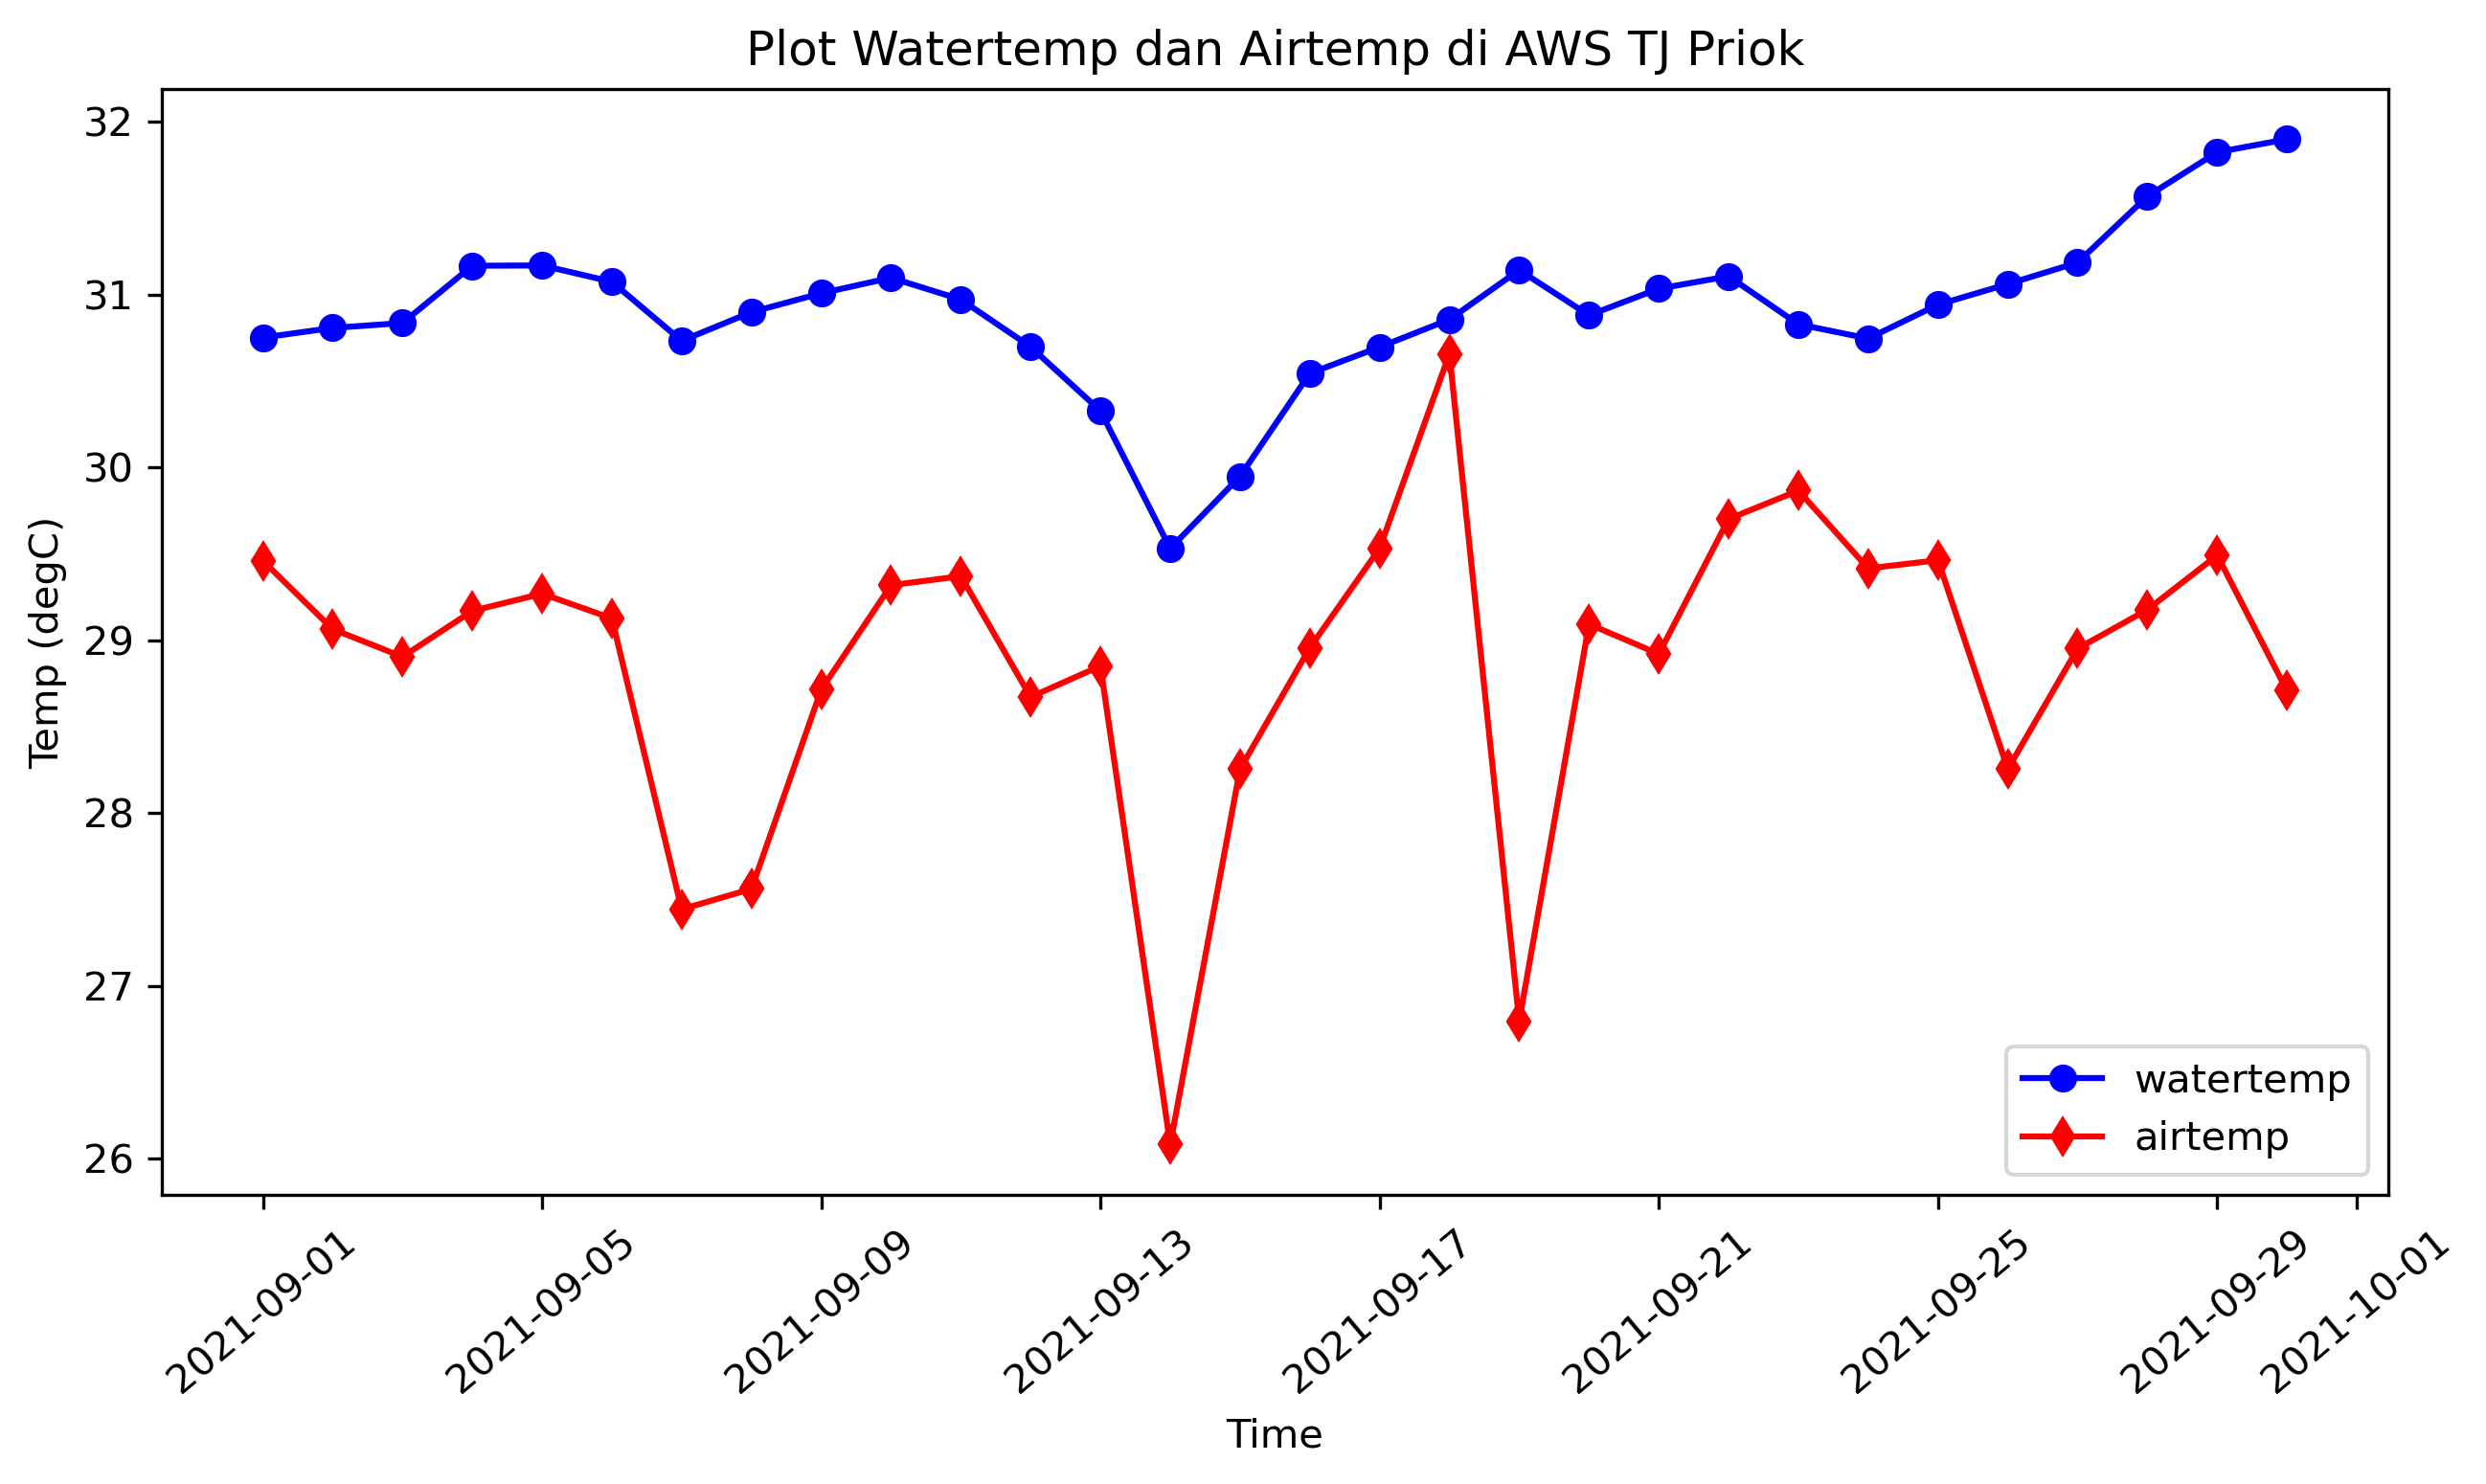

In [3]:
# LINE PLOT

plt.figure(figsize=(10,5), dpi=300)
plt.plot(df.index, df['watertemp'], color='b', marker='o', label='watertemp')
plt.plot(df.index, df['temp'], color='r', marker='d', label='airtemp')
plt.xticks(rotation=40)
plt.xlabel("Time")
plt.ylabel("Temp (degC)")
plt.title("Plot Watertemp dan Airtemp di AWS TJ Priok")
plt.legend(loc='lower right')

NameError: name 'fig' is not defined

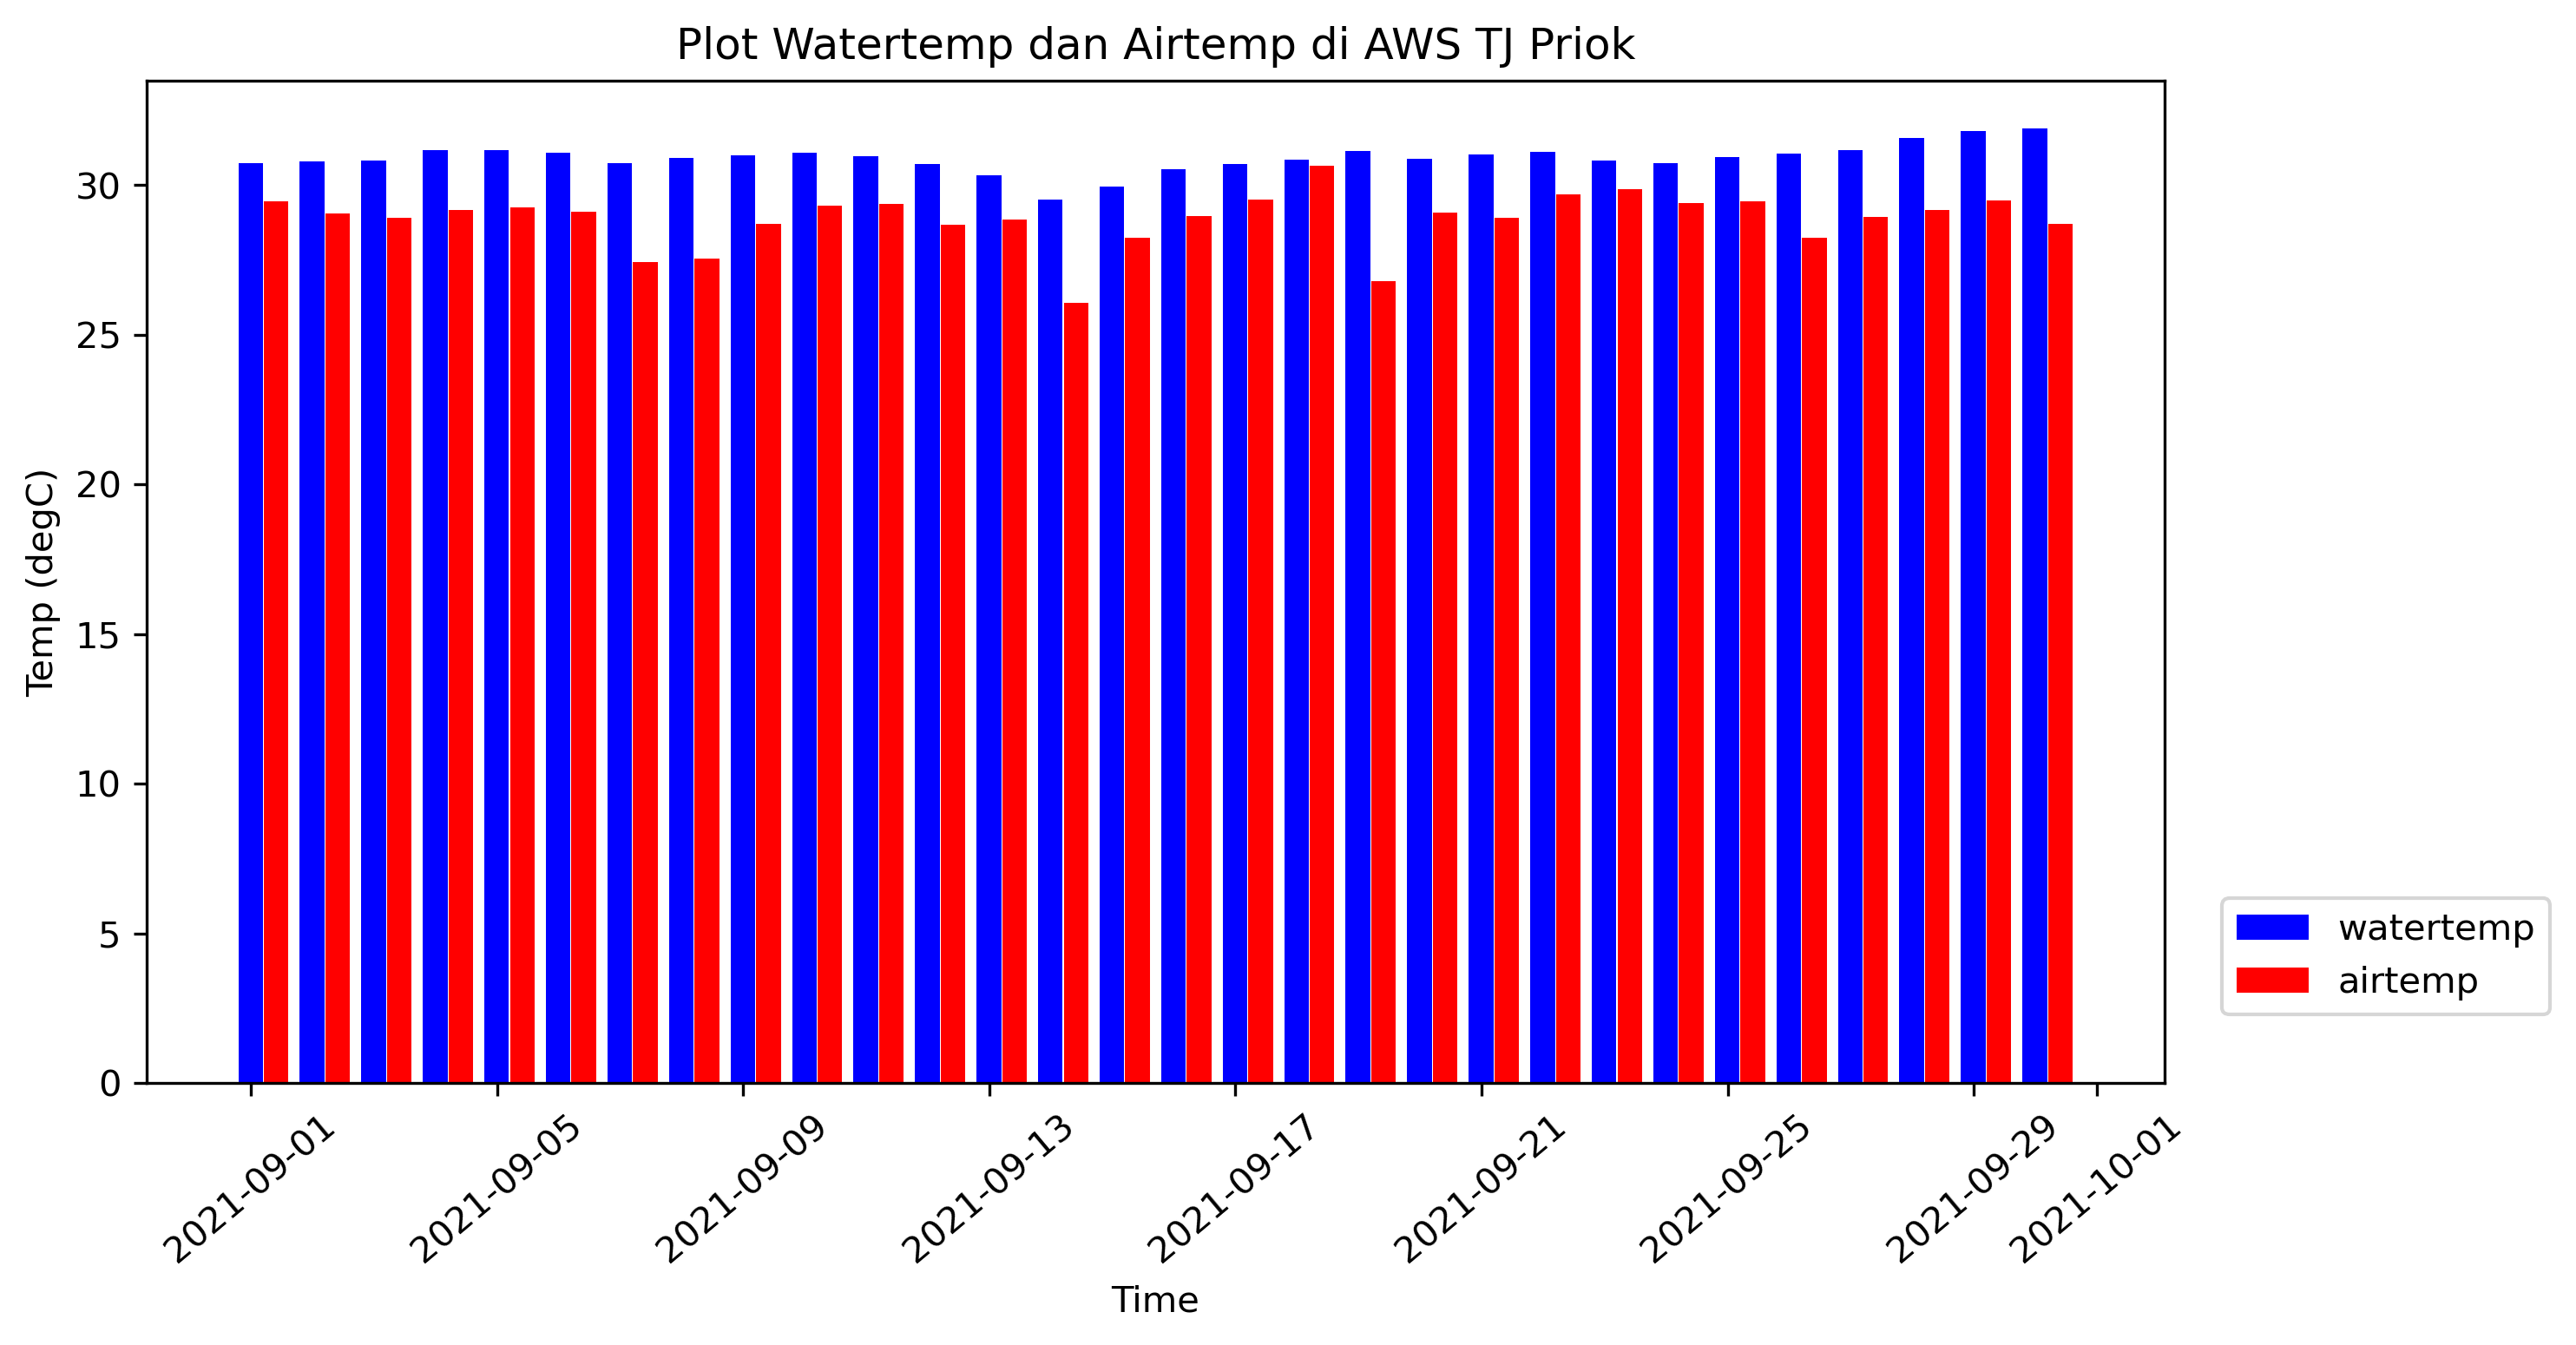

In [4]:
# BAR PLOT

width = 0.2
plt.figure(figsize=(10,5), dpi=300)
plt.bar(df.index-datetime.timedelta(hours=5), df['watertemp'], color='b', label='watertemp', align='edge', width=0.4)
plt.bar(df.index+datetime.timedelta(hours=5), df['temp'], color='r', label='airtemp', align='edge', width=0.4)
plt.xticks(rotation=40)
plt.xlabel("Time")
plt.ylabel("Temp (degC)")
plt.title("Plot Watertemp dan Airtemp di AWS TJ Priok")
plt.legend(loc='lower right', bbox_to_anchor=(1.2,0.05))
fig.tight_layout()
plt.show()

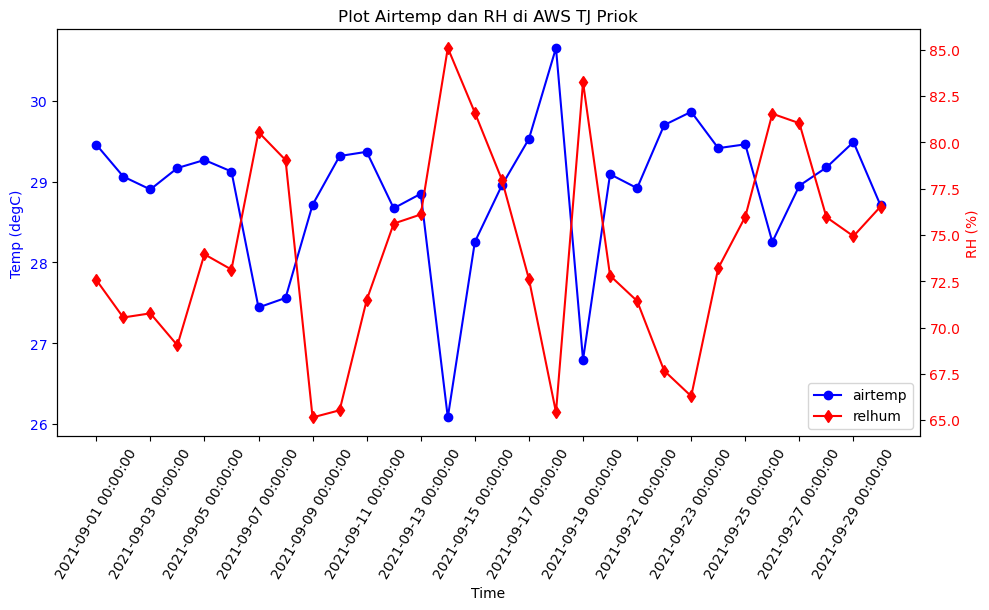

In [106]:
# LINE PLOT 2 AXES

fig, ax1 = plt.subplots(figsize=(10,5))
line1, = ax1.plot(df.index, df['temp'], color='b', marker='o', label='airtemp')
ax1.set_xlabel("Time")
ax1.set_ylabel("Temp (degC)", color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.legend(loc='lower right')

ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['rh'], color='r', marker='d', label='relhum')
ax2.set_ylabel("RH (%)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Plot Airtemp dan RH di AWS TJ Priok")
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend([line1, line2], labels, loc='lower right')

fig.tight_layout()
ax1.set_xticks(ticks=df.index[::2], labels= df.index[::2], rotation=60)
plt.show()

## Scatter Plot

/tmp/ipykernel_31756/3468112991.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


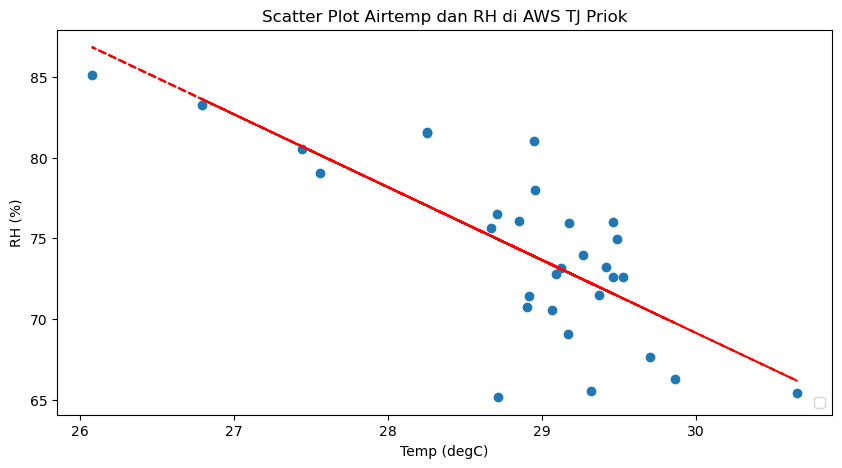

In [131]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['temp'], df['rh'])
ax.set_xlabel("Temp (degC)")
ax.set_ylabel("RH (%)")
plt.title("Scatter Plot Airtemp dan RH di AWS TJ Priok")
plt.legend(loc='lower right')

z = np.polyfit(df['temp'], df['rh'], 1)
p = np.poly1d(z)
ax.plot(df['temp'],p(df['temp']),"r--")

plt.show()

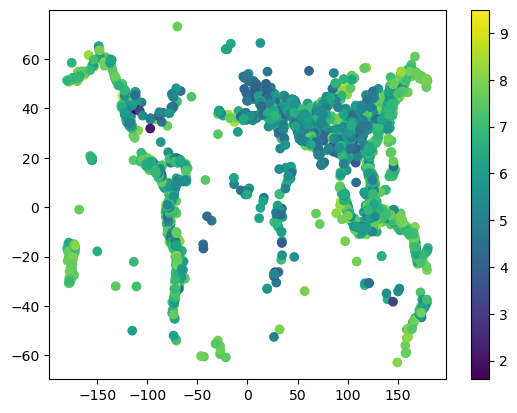

In [9]:
import pooch
import numpy as np
import matplotlib.pyplot as plt

fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

plt.scatter(longitude, latitude, c=magnitude, cmap='viridis')
plt.colorbar()

## Histogram

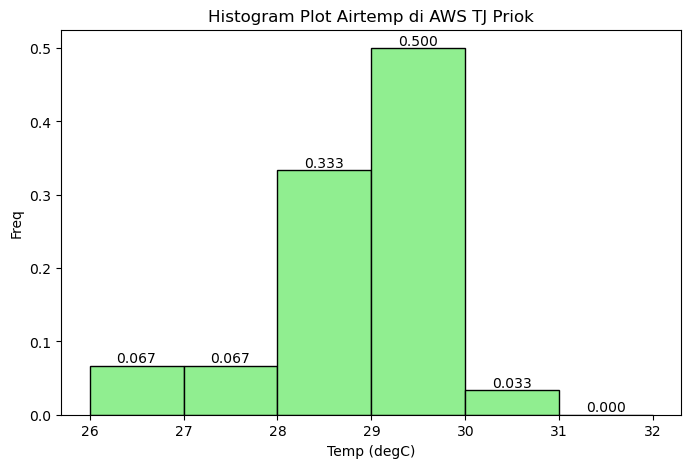

In [149]:
fig, ax = plt.subplots(figsize=(8,5))
counts, bins, patches = ax.hist(df['temp'], density=True, range=(26,32), color='lightgreen', edgecolor='black', bins=6)

for count, bin_start in zip(counts, bins):
    bin_center = bin_start + (bins[1] - bins[0])/2
    ax.text(bin_center, count, f"{count:.3f}", horizontalalignment='center', verticalalignment='bottom')

ax.set_xlabel("Temp (degC)")
ax.set_ylabel("Density")
plt.title("Histogram Plot Airtemp di AWS TJ Priok")

plt.show()

## Multiple Plot

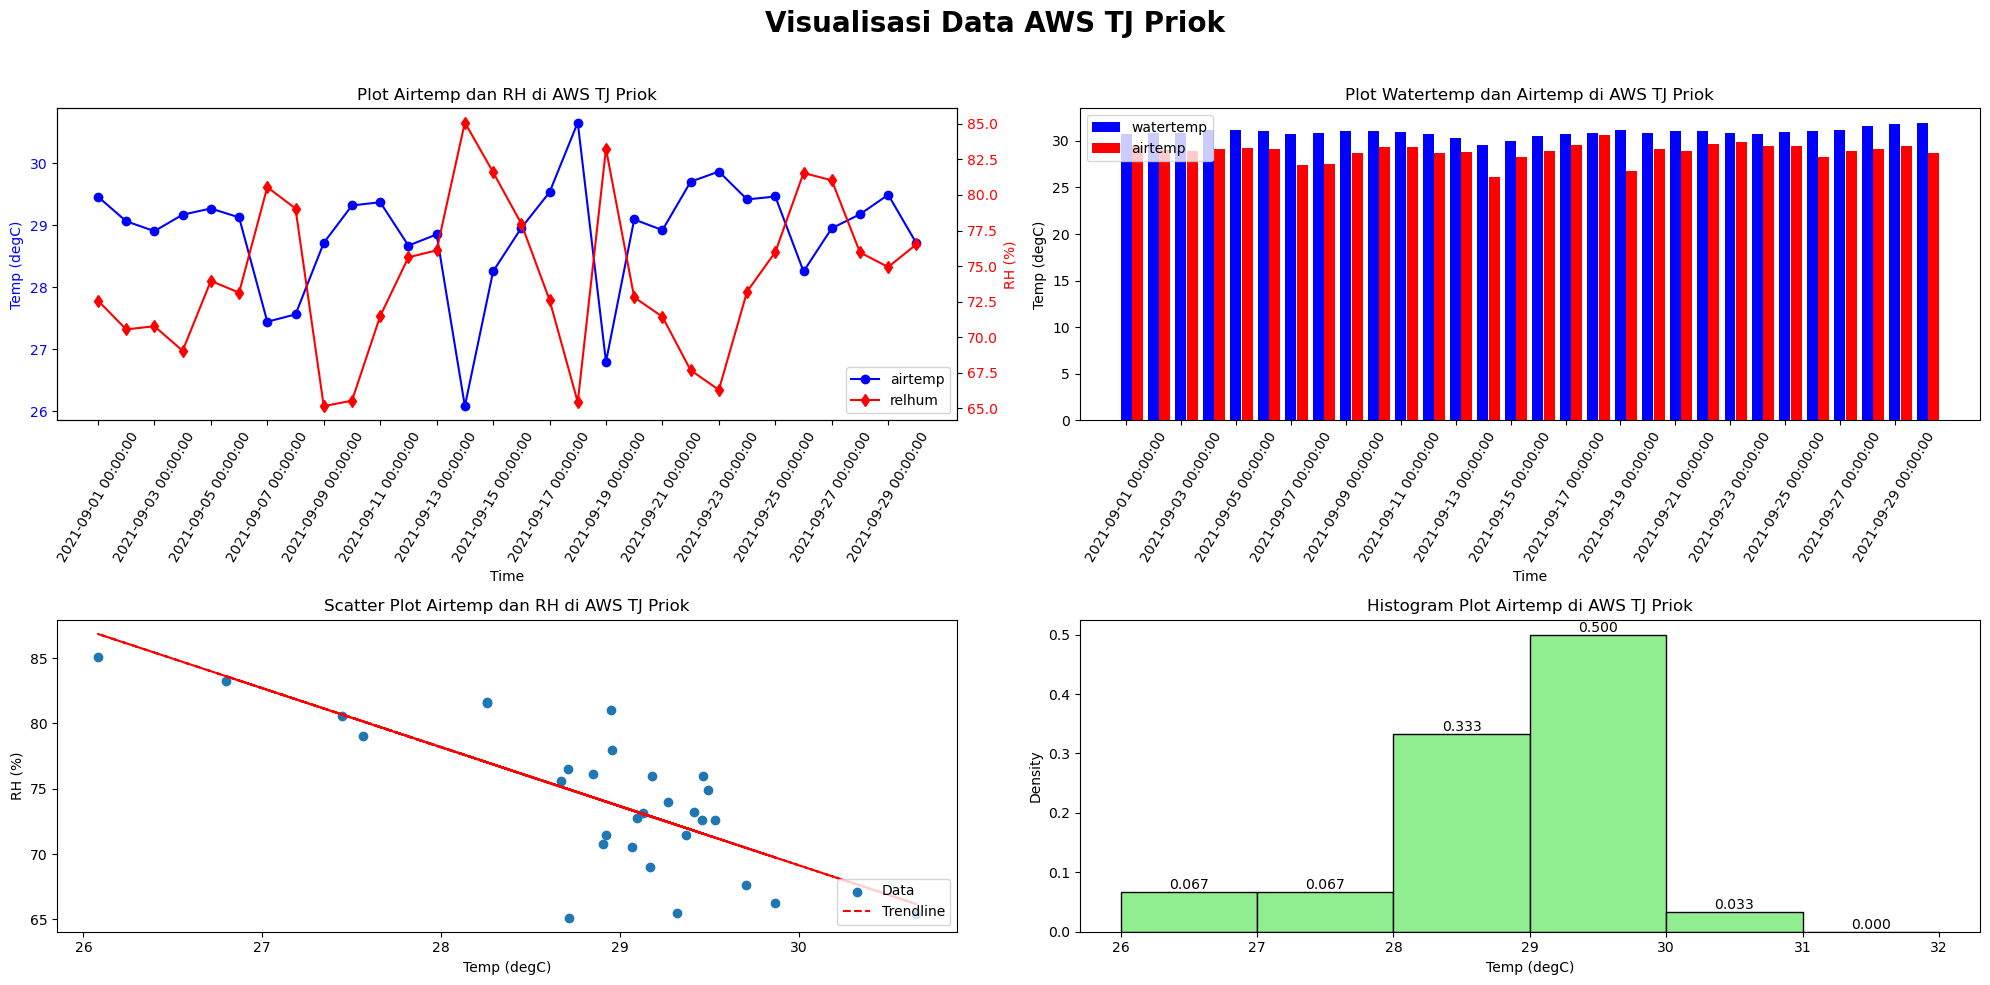

In [166]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=2, nrows=2)

# =======================================================================================
# Top-left: Time series with dual y-axis
line1, = ax[0,0].plot(df.index, df['temp'], color='b', marker='o', label='airtemp')
ax[0,0].set_xlabel("Time")
ax[0,0].set_ylabel("Temp (degC)", color='b')
ax[0,0].tick_params(axis='y', labelcolor='b')
ax[0,0].set_title("Plot Airtemp dan RH di AWS TJ Priok")
ax[0,0].set_xticks(df.index[::2])
ax[0,0].set_xticklabels(df.index[::2], rotation=60)

ax00copy = ax[0,0].twinx()
line2, = ax00copy.plot(df.index, df['rh'], color='r', marker='d', label='relhum')
ax00copy.set_ylabel("RH (%)", color='r')
ax00copy.tick_params(axis='y', labelcolor='r')

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax[0,0].legend(lines, labels, loc='lower right')

# =======================================================================================
# Top-right: Grouped bar plot
width = 0.2
ax[0,1].bar(df.index - datetime.timedelta(hours=5), df['watertemp'], color='b', label='watertemp', align='edge', width=0.4)
ax[0,1].bar(df.index + datetime.timedelta(hours=5), df['temp'], color='r', label='airtemp', align='edge', width=0.4)
ax[0,1].set_xticks(df.index[::2])
ax[0,1].set_xticklabels(df.index[::2], rotation=60)
ax[0,1].set_xlabel("Time")
ax[0,1].set_ylabel("Temp (degC)")
ax[0,1].set_title("Plot Watertemp dan Airtemp di AWS TJ Priok")
ax[0,1].legend(loc='upper left')

# =======================================================================================
# Bottom-left: Scatter plot with trendline
ax[1,0].scatter(df['temp'], df['rh'], label='Data')
ax[1,0].set_xlabel("Temp (degC)")
ax[1,0].set_ylabel("RH (%)")
ax[1,0].set_title("Scatter Plot Airtemp dan RH di AWS TJ Priok")

z = np.polyfit(df['temp'], df['rh'], 1)
p = np.poly1d(z)
ax[1,0].plot(df['temp'], p(df['temp']), "r--", label='Trendline')
ax[1,0].legend(loc='lower right')

# =======================================================================================
# Bottom-right: Histogram
counts, bins, patches = ax[1,1].hist(df['temp'], density=True, range=(26, 32), color='lightgreen', edgecolor='black', bins=6)

for count, bin_start in zip(counts, bins[:-1]):  # bins[:-1] because len(bins) = len(counts)+1
    bin_center = bin_start + (bins[1] - bins[0])/2
    ax[1,1].text(bin_center, count, f"{count:.3f}", ha='center', va='bottom')

ax[1,1].set_xlabel("Temp (degC)")
ax[1,1].set_ylabel("Density")
ax[1,1].set_title("Histogram Plot Airtemp di AWS TJ Priok")

# =======================================================================================
fig.suptitle("Visualisasi Data AWS TJ Priok", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.tight_layout()
plt.show()
